In [1]:
import nbformat as nbf
from glob import glob

import uuid
def get_cell_id(id_length=8):
    return uuid.uuid4().hex[:id_length]

# -- SETUP
nb_name = 'my_notebook'

# -- MAIN
# grab notebook
notebooks = list(filter(lambda x: nb_name in x, glob("./*.ipynb", recursive=True)))

# iterate over notebooks
for ipath in sorted(notebooks):
    # load notebook
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)
    
    cell_ids = []
    for cell in ntbk.cells:
        cell_ids.append(cell['id'])

    # reset cell ids if there are duplicates
    if not len(cell_ids) == len(set(cell_ids)): 
        for cell in ntbk.cells:
            cell['id'] = get_cell_id()

        nbf.write(ntbk, ipath)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

Y variable is:  9


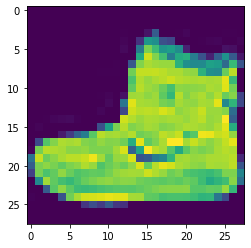

In [6]:
plt.imshow(X_train[0])
print('Y variable is: ',Y_train[0])

In [7]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
def plot_sample(X,Y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

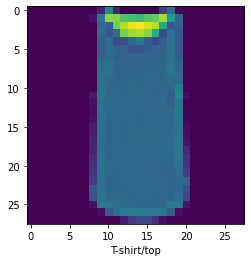

In [10]:
plot_sample(X_train,Y_train,2)

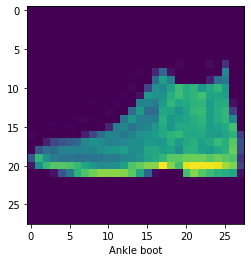

In [11]:
plot_sample(X_test,Y_test,0)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=28,28
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [15]:
input_shape

(28, 28, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D

In [17]:
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 256s 136ms/step - loss: 0.4741 - accuracy: 0.8318
Epoch 2/5
1875/1875 [==============================] - 278s 148ms/step - loss: 0.3268 - accuracy: 0.8811
Epoch 3/5
1875/1875 [==============================] - 279s 149ms/step - loss: 0.2830 - accuracy: 0.8981
Epoch 4/5
1875/1875 [==============================] - 282s 150ms/step - loss: 0.2520 - accuracy: 0.9073
Epoch 5/5
1875/1875 [==============================] - 282s 150ms/step - loss: 0.2297 - accuracy: 0.9161


In [21]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 12s 36ms/step - loss: 0.2267 - accuracy: 0.9171


[0.22665534913539886, 0.9171000123023987]

### Check the predictions

In [22]:
Y_predict=model.predict(X_test)

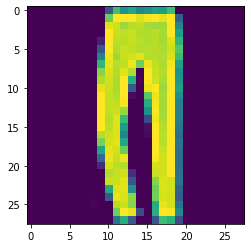

In [23]:
plt.imshow(X_test[2])

In [24]:
# possible probabilities for values from 0 to 9
Y_predict[2]

array([5.8174030e-09, 1.0000000e+00, 3.2484887e-12, 7.0559278e-09,
       1.1124818e-09, 4.5470394e-12, 8.0389906e-10, 2.7043810e-15,
       1.4351387e-11, 6.9996346e-15], dtype=float32)

In [25]:
# To print which number is having max probability from 0 to 9 => our final prediction value
np.argmax(Y_predict[2])

1

In [26]:
print('Actual :',Y_test[2])
print('Predicted :',np.argmax(Y_predict[2]))

Actual : 1
Predicted : 1


In [27]:
Y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [28]:
Y_predict[0:5]

array([[2.8163069e-11, 3.0105682e-10, 1.0656410e-12, 3.3124464e-10,
        6.3436769e-12, 1.8081671e-06, 9.7838064e-11, 6.7689136e-05,
        2.2862965e-09, 9.9993050e-01],
       [6.0992925e-06, 2.7421143e-14, 9.9997401e-01, 1.4055320e-09,
        5.8081810e-06, 5.4095864e-14, 1.4054223e-05, 9.4131440e-17,
        5.5429411e-11, 3.4794047e-15],
       [5.8174030e-09, 1.0000000e+00, 3.2484887e-12, 7.0559278e-09,
        1.1124818e-09, 4.5470394e-12, 8.0389906e-10, 2.7043810e-15,
        1.4351387e-11, 6.9996346e-15],
       [1.8747270e-09, 1.0000000e+00, 2.4975436e-12, 2.9153000e-08,
        7.2242052e-09, 6.1054790e-12, 2.1389972e-09, 2.8626349e-15,
        7.1613748e-12, 8.5040739e-14],
       [2.0020949e-02, 4.1956486e-08, 7.1041291e-03, 8.9111517e-04,
        1.4452198e-02, 3.4324925e-11, 9.5752901e-01, 2.4042820e-11,
        2.6203973e-06, 1.3443173e-10]], dtype=float32)

In [29]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]
Y_predict_labels[0:5]

[9, 2, 1, 1, 6]

In [30]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[898,   0,  17,  12,   3,   0,  67,   0,   3,   0],
       [  2, 980,   0,  10,   2,   0,   4,   0,   2,   0],
       [ 11,   0, 881,   9,  49,   0,  50,   0,   0,   0],
       [ 18,   2,   7, 927,  26,   0,  20,   0,   0,   0],
       [  1,   0,  44,  23, 880,   0,  51,   0,   1,   0],
       [  0,   0,   0,   0,   0, 977,   0,  17,   0,   6],
       [137,   1,  71,  21,  63,   0, 699,   0,   8,   0],
       [  0,   0,   0,   0,   0,   3,   0, 975,   0,  22],
       [  3,   0,   3,   3,   1,   1,   2,   3, 984,   0],
       [  1,   0,   0,   0,   0,   5,   0,  24,   0, 970]])>

Text(69.0, 0.5, 'Truth')

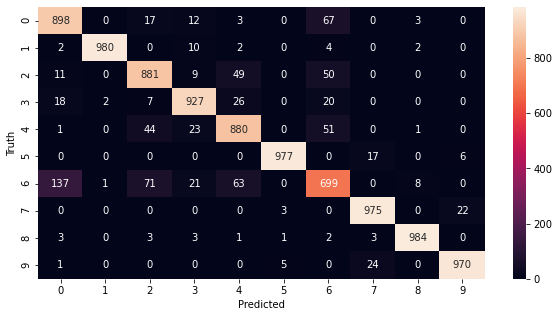

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## LENET

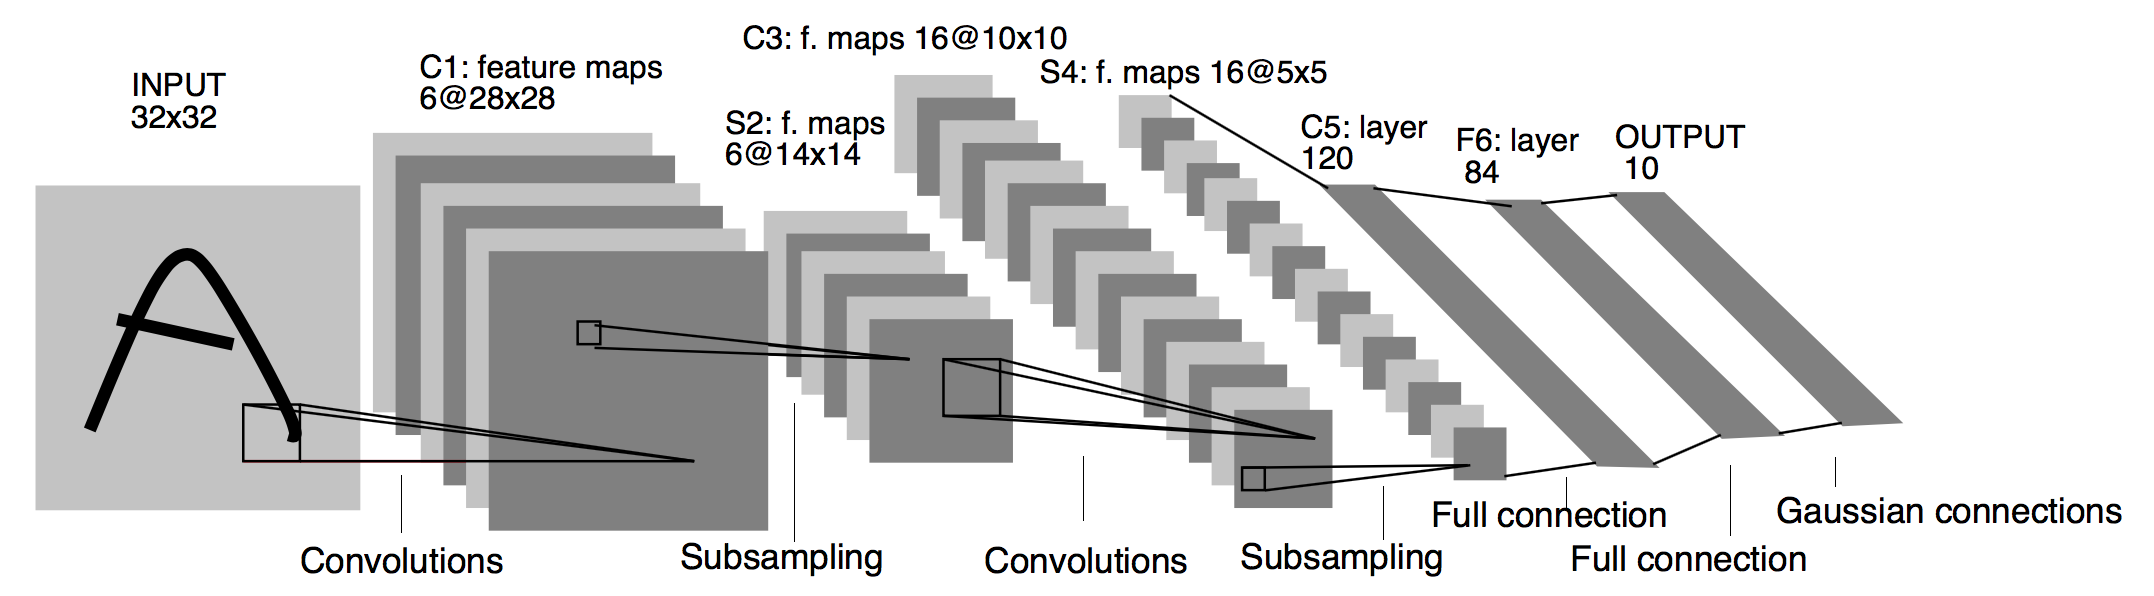

In [32]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [35]:
import cv2
img=cv2.resize(X_train[0],(32,32))
img.shape

(32, 32)

In [36]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(32,32))
    X_train_resize.append(img)

In [37]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(32,32))
    X_test_resize.append(img)

In [38]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [39]:
print(X_train_resize.shape)
print(X_test_resize.shape)

(60000, 32, 32)
(10000, 32, 32)


In [40]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [41]:
X_train_resize

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=32,32
if k.image_data_format() == 'channels_first':
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], 1, img_rows, img_cols)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], img_rows, img_cols, 1)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [43]:
input_shape

(32, 32, 1)

In [44]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),name='conv1',activation='relu',input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(16, kernel_size=(5, 5),name='conv2',activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=2))
model.add(Flatten())
model.add(Dense(120, name='dense1',activation='relu'))
model.add(Dense(84, name='dense2',activation='relu'))
model.add(Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense1 (Dense)               (None, 120)               48120     
_________________________________________________________________
dense2 (Dense)               (None, 84)               

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
model.fit(X_train_resize,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 51s 26ms/step - loss: 0.5179 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3472 - accuracy: 0.8736
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3109 - accuracy: 0.8849
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2855 - accuracy: 0.8949
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2675 - accuracy: 0.9011


In [50]:
model.evaluate(X_test_resize,Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3257 - accuracy: 0.8875


[0.3257218599319458, 0.887499988079071]

## ALEXNET

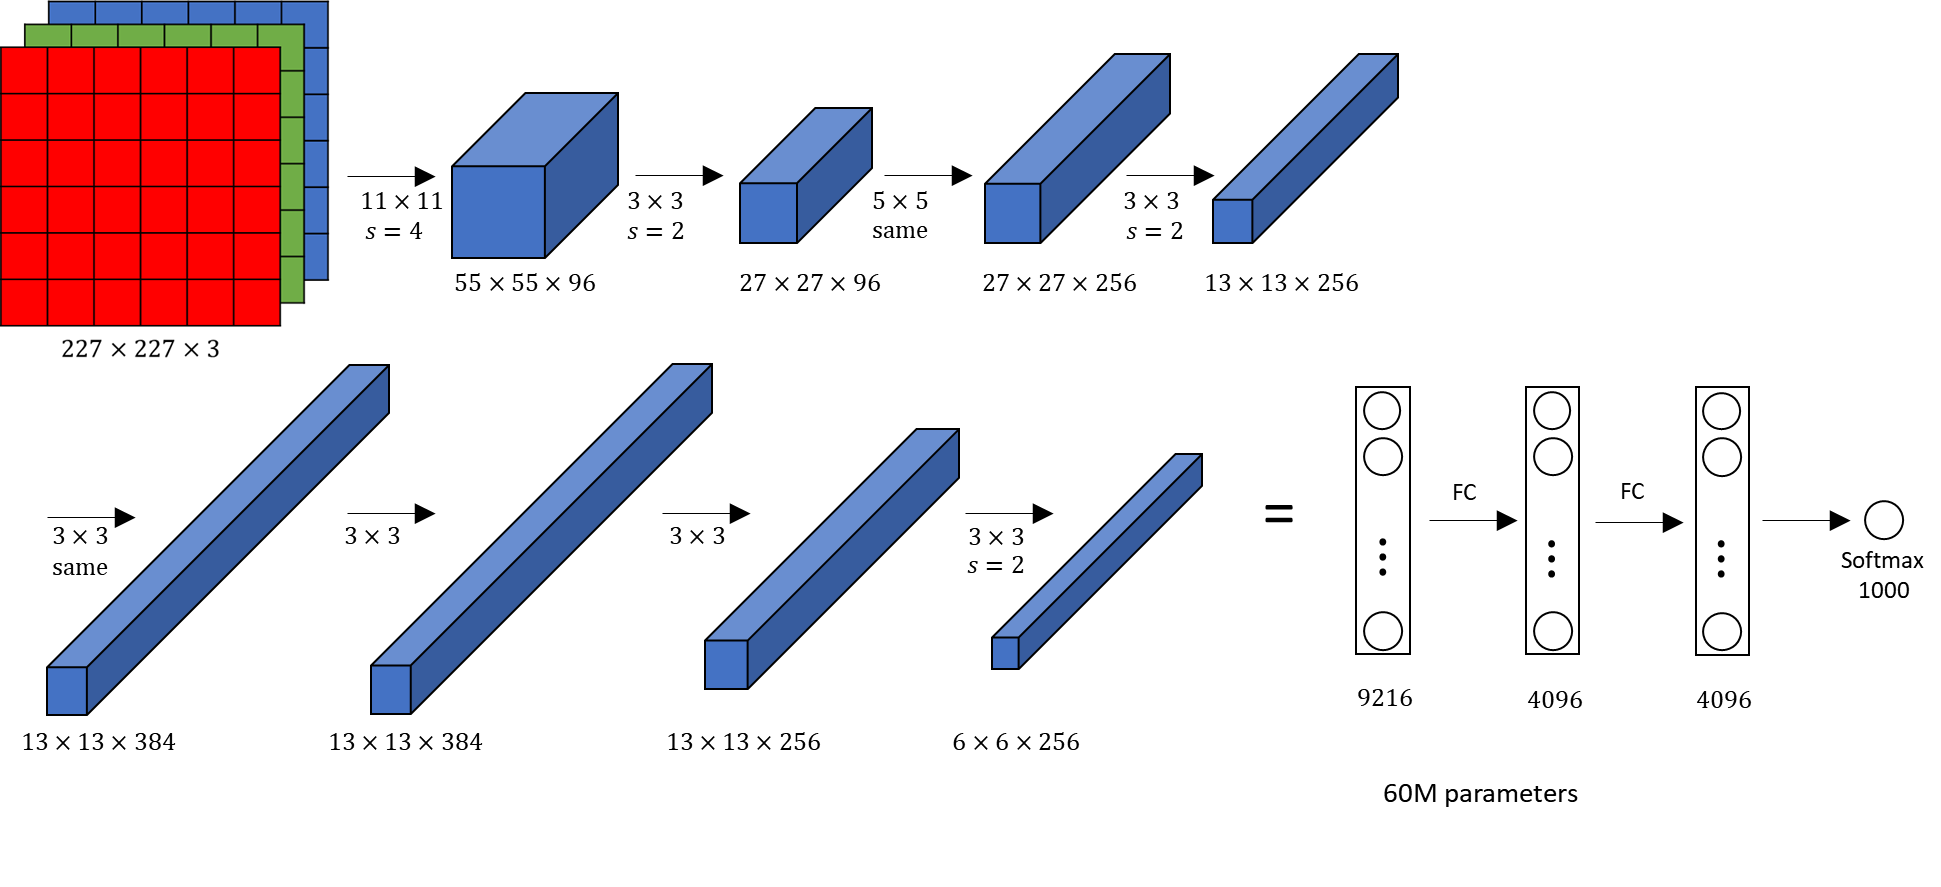

In [51]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
img=cv2.resize(X_train[0],(227,227))
img.shape

(227, 227)

In [54]:
X_train_resize=[]

for i in range(0,len(X_train)):
    img=cv2.resize(X_train[i],(227,227))
    X_train_resize.append(img)

In [61]:
X_test_resize=[]

for i in range(0,len(X_test)):
    img=cv2.resize(X_test[i],(227,227))
    X_test_resize.append(img)

In [62]:
X_train_resize = np.array(X_train_resize)
X_test_resize = np.array(X_test_resize)

In [63]:
print(X_train_resize.shape)
print(X_test_resize.shape)

(60000, 227, 227)
(10000, 227, 227)


In [64]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [65]:
X_train_resize

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [67]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=227,227
if k.image_data_format() == 'channels_first':
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], 1, img_rows, img_cols)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], img_rows, img_cols, 1)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [68]:
input_shape

(227, 227, 1)

In [79]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11),name='conv1',activation='relu',strides=4,input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Conv2D(256, kernel_size=(5, 5),name='conv2',activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Conv2D(filters=384, kernel_size=(3,3),name="conv3",activation="relu",padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3,3),name="conv4",activation="relu",padding="same")) 
model.add(Conv2D(filters=256, kernel_size=(3,3),name="conv5",activation="relu",padding="same")) 
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Flatten())
model.add(Dense(4096,name="dense1",activation="relu"))
model.add(Dense(4096,name="dense2",activation="relu"))
model.add(Dense(1000,name="dense3",activation="relu")) 
model.add(Dense(10,name="output",activation="softmax")) 

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        11712     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 13, 13, 384)       885120    
_________________________________________________________________
conv4 (Conv2D)               (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv5 (Conv2D)               (None, 13, 13, 256)      

In [81]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
# model.fit(X_train_resize,Y_train,epochs=5)

## Very large size o/p, so very slow. To prevent that add dropout,batch normalization layers.

In [84]:
# model.evaluate(X_test_resize,Y_test)

In [90]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11),\
strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [91]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 55, 55, 96)        11712     
_________________________________________________________________
activation_9 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 256)      

In [92]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [93]:
model.fit(X_train_resize,Y_train,epochs=5)

Epoch 1/5
   8/1875 [..............................] - ETA: 7:17:57 - loss: 4.6137 - accuracy: 0.3359

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_resize,Y_test)

## VGGNET

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# img=cv2.resize(X_train[0],(224,224))
# img.shape

In [6]:
# X_train_resize=[]

# for i in range(0,len(X_train)):
#     img=cv2.resize(X_train[i],(224,224))
#     X_train_resize.append(img)

In [7]:
# X_test_resize=[]

# for i in range(0,len(X_test)):
#     img=cv2.resize(X_test[i],(224,224))
#     X_test_resize.append(img)

In [8]:
# X_train_resize = np.array(X_train_resize)
# X_test_resize = np.array(X_test_resize)

In [9]:
# X_train_resize.shape

In [10]:
# X_test_resize.shape

In [11]:
# X_train = X_train_resize[..., tf.newaxis].astype("float32")
# X_test = X_test_resize[..., tf.newaxis].astype("float32")

In [12]:
# X_train_resize = cv2.resize(X_train_resize, (224,224,1))
# X_test_resize = cv2.resize(X_test_resize, (224,224,1))

In [13]:
# print(X_train_resize.shape)
# print(X_test_resize.shape)

In [14]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
# X_train_resize

In [16]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=224,224
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_resize = X_train_resize.reshape(X_train_resize.shape[0], img_rows, img_cols, 1)
    X_test_resize = X_test_resize.reshape(X_test_resize.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

NameError: name 'X_train_resize' is not defined

In [ ]:
input_shape

In [191]:
X_train.shape

(60000, 28, 28)

In [192]:
X_train[0].shape

(28, 28)

In [193]:
# X_train[0] = cv2.resize(X_train[0], (28,28,1))

In [194]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from keras.models import Model

In [195]:
IMAGE_SIZE=[224,224]

In [196]:
vgg = VGG16(weights='imagenet', include_top=False,input_shape=IMAGE_SIZE+[3])

In [197]:
for layer in vgg.layers:
    layer.trainable=False

In [198]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [199]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [200]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [201]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [202]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  

In [203]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

In [204]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [205]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [206]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [208]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [214]:
len(X_train)

60000

In [215]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [216]:
index_values=list(range(0,len(X_train)))

In [218]:
df = pd.DataFrame(data = X_train, 
                  index = index_values)

ValueError: Must pass 2-d input. shape=(60000, 28, 28)

In [213]:
X_train=pd.DataFrame(X_train)

ValueError: Must pass 2-d input. shape=(60000, 28, 28)

In [211]:
training_set = train_datagen.flow_from_dataframe(X_train,target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [207]:
model.fit(X_train_resize,Y_train,epochs=5)

Epoch 1/5


ValueError: in user code:

    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (32, 224, 224, 1)


In [167]:
x=Flatten(vgg.output)
x

AttributeError: 'KerasTensor' object has no attribute 'lower'

In [ ]:
prediction=Dense(10,activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [157]:
# model = Model(inputs=model.input, outputs=model.outputs)

In [118]:
# tf.keras.utils.plot_model(model, "VGG16.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [158]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [164]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [165]:
model.fit(X_train_resize,Y_train,epochs=5)

Epoch 1/5


ValueError: in user code:

    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\z032836\Anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (32, 224, 224, 1)


In [ ]:
model.evaluate(X_test_resize,Y_test)

## Inception 

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
model = InceptionV3(weights='imagenet', include_top=True)

In [ ]:
model = Model(inputs=model.input, outputs=model.outputs)

In [ ]:
tf.keras.utils.plot_model(model, "inception_.png", show_shapes=True)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=5)

In [ ]:
model.evaluate(X_test,Y_test)

# RES NET

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [ ]:
model = ResNet50(weights='imagenet',include_top=True)

In [ ]:
model = Model(inputs=model.input, outputs=model.outputs)

In [ ]:
tf.keras.utils.plot_model(model, "renet50.png", show_shapes=True)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=5)

In [ ]:
model.evaluate(X_test,Y_test)